# US Prison Analysis

This is an analysis of the admissions and releases of convicts in prisons all over the United States. The data are categorized according to the state and the racial background of the convicts. The dataset came from the Kaggle notebook summarized by Konrad Banachewicz (2023) which can be found here: https://www.kaggle.com/datasets/konradb/prison-population-in-the-us

## Set-up

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import textwrap as tw

In [274]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/US Prison Data/prison_data_revised.csv")
df = pd.DataFrame(df)

## Data Cleaning

In [275]:
## Correcting data types.

df["date"] = pd.to_datetime(df["date"])

In [276]:
## add another column for Month

df["month"] = df["date"].dt.strftime("%B")
df["year"] = df["date"].dt.strftime("%Y")

In [277]:
##correcting data types for the rates.

admissions_rate = [name for name in df.columns if ("rate" in name) & ("admissions" in name)]

df[admissions_rate] = df[admissions_rate].apply(lambda x: x.str.replace('%',''))
for x in admissions_rate:
  df[x] = df[x].astype('float')

In [278]:
## creating the list of admissions-related columns

admissions_column = [column for column in df.columns if ("admissions" in column) & ("rate" not in column)]
admissions_column

['total_admissions',
 'admissions_white',
 'admissions_black',
 'admissions_hispanic',
 'admissions_amerind',
 'admissions_asian',
 'admissions_other']

In [279]:
## dropping columns regarding releases.

df_columns = df.columns

releases_columns = [column for column in df_columns if "releases" in column]
df = df.drop(columns=releases_columns,axis=1)

## Data Analysis

In [280]:
df.describe()[["admissions_white","admissions_black","admissions_hispanic","admissions_amerind","admissions_asian","admissions_other"]]

,admissions_white,admissions_black,admissions_hispanic,admissions_amerind,admissions_asian,admissions_other
count,1914.000000,1914.000000,1914.000000,1914.0000,1914.000000,1914.000000
mean,452.177116,192.448276,144.726750,19.3093,3.864159,9.731975
std,413.678840,268.842100,339.850524,24.6161,4.929650,21.344895
min,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,217.000000,36.000000,0.000000,1.0000,0.000000,0.000000
50%,368.500000,109.000000,26.000000,13.0000,3.000000,2.000000
75%,458.000000,264.000000,96.000000,29.0000,6.000000,13.000000
max,2707.000000,1918.000000,2208.000000,159.0000,40.000000,217.000000


In [281]:
## Finding the total of admissions for each racial background.
print("Total admissions per racial background.")

df[["admissions_white","admissions_black","admissions_hispanic","admissions_amerind","admissions_asian","admissions_other"]].sum().to_frame()

Total admissions per racial background.


,0
admissions_white,865467
admissions_black,368346
admissions_hispanic,277007
admissions_amerind,36958
admissions_asian,7396
admissions_other,18627


In [282]:
## total admissions per year.

print("Total Admissions Per Year")

df.groupby("year").agg("sum")["total_admissions"].to_frame()

Total Admissions Per Year


<ipython-input-282-b84b09e72d0f>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("year").agg("sum")["total_admissions"].to_frame()


,total_admissions
year,
2000,8352
2001,8376
2002,8844
2003,8736
2004,9552
2005,9696
2006,10524
2007,10332
2008,25823


In [283]:
## total admissions per racial background per year.

print("Total admissions per racial background per year")

df.groupby("year").agg({
    "total_admissions":"sum",
    "admissions_white":"sum",
    "admissions_black":"sum",
    "admissions_hispanic":"sum",
    "admissions_amerind":"sum",
    "admissions_asian":"sum",
    "admissions_other":"sum"
})

Total admissions per racial background per year


,total_admissions,admissions_white,admissions_black,admissions_hispanic,admissions_amerind,admissions_asian,admissions_other
year,,,,,,,
2000,8352,3972,4008,0,312,48,0
2001,8376,4044,3948,0,312,48,0
2002,8844,4296,4164,0,312,48,0
2003,8736,4212,4128,0,288,60,12
2004,9552,4740,4368,0,348,60,12
2005,9696,4968,4272,0,372,60,24
2006,10524,5328,4656,0,456,60,12
2007,10332,5256,4548,0,420,72,0
2008,25823,16629,8303,205,450,78,134


In [284]:
## create a separate dataframe for data in 2022

df_2022 = df.loc[df["year"] == "2022"]

In [285]:
## Total admissions per state in 2022

print("Total admissions per state in 2022")

df_2022.groupby("state").agg("sum")["total_admissions"].to_frame().sort_values("total_admissions",ascending=False)

Total admissions per state in 2022


<ipython-input-285-c4b44b558610>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2022.groupby("state").agg("sum")["total_admissions"].to_frame().sort_values("total_admissions",ascending=False)


,total_admissions
state,
Texas,26062
California,16689
Arizona,9713
Kentucky,9199
Illinois,7542
Wisconsin,4656
Idaho,4529
Colorado,4384
Kansas,3407


In [286]:
## Total admissions per state in 2022 per racial background.

print("Total admissions per state in 2022 per racial background")

df_2022.groupby("state").agg("sum")[["total_admissions","admissions_white","admissions_black","admissions_hispanic","admissions_amerind","admissions_asian","admissions_other"]].sort_values("total_admissions",ascending=False)

Total admissions per state in 2022 per racial background


<ipython-input-286-31750ab4620e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2022.groupby("state").agg("sum")[["total_admissions","admissions_white","admissions_black","admissions_hispanic","admissions_amerind","admissions_asian","admissions_other"]].sort_values("total_admissions",ascending=False)


,total_admissions,admissions_white,admissions_black,admissions_hispanic,admissions_amerind,admissions_asian,admissions_other
state,,,,,,,
Texas,26062,10156,7000,8771,0,0,135
California,16689,4206,3633,7946,0,0,904
Arizona,9713,3526,1348,3828,781,44,186
Kentucky,9199,7535,1420,104,8,13,119
Illinois,7542,2811,3954,738,6,9,24
Wisconsin,4656,2538,1669,0,392,55,2
Idaho,4529,3229,116,599,164,0,156
Colorado,4384,2212,579,1349,195,28,16
Kansas,3407,2384,814,0,174,33,2


In [287]:
## average admissions made per prison per racial background.

print("average admissions made per prison per racial background")

df_2022.groupby("state").agg("mean")[["total_admissions","admissions_white","admissions_black","admissions_hispanic","admissions_amerind","admissions_asian","admissions_other"]].sort_values("total_admissions",ascending=False)

average admissions made per prison per racial background


<ipython-input-287-22b57c6b09e7>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2022.groupby("state").agg("mean")[["total_admissions","admissions_white","admissions_black","admissions_hispanic","admissions_amerind","admissions_asian","admissions_other"]].sort_values("total_admissions",ascending=False)


,total_admissions,admissions_white,admissions_black,admissions_hispanic,admissions_amerind,admissions_asian,admissions_other
state,,,,,,,
Texas,4343.666667,1692.666667,1166.666667,1461.833333,0.000000,0.000000,22.500000
California,2384.142857,600.857143,519.000000,1135.142857,0.000000,0.000000,129.142857
Kentucky,1314.142857,1076.428571,202.857143,14.857143,1.142857,1.857143,17.000000
Illinois,1257.000000,468.500000,659.000000,123.000000,1.000000,1.500000,4.000000
Arizona,1079.222222,391.777778,149.777778,425.333333,86.777778,4.888889,20.666667
Wisconsin,582.000000,317.250000,208.625000,0.000000,49.000000,6.875000,0.250000
Idaho,566.125000,403.625000,14.500000,74.875000,20.500000,0.000000,19.500000
Colorado,548.000000,276.500000,72.375000,168.625000,24.375000,3.500000,2.000000
Washington,408.750000,237.625000,58.750000,68.875000,25.625000,14.125000,3.750000


In [288]:
## creating a table for the total admissions and percentage of the total.


## finding the total admissions over the years.
total_admissions = df_2022["total_admissions"].sum()

## creating the dataframe.
percent_table = pd.DataFrame({
    "racial_background":["White","Black","Hispanic","American-Indian","Asian","Others"],
    "total_admissions":[df_2022["admissions_white"].sum(),df_2022["admissions_black"].sum(),df_2022["admissions_hispanic"].sum(),df_2022["admissions_amerind"].sum(),df_2022["admissions_asian"].sum(),df_2022["admissions_other"].sum()],
    "total_percent":[df_2022["admissions_white"].sum()/total_admissions,df_2022["admissions_black"].sum()/total_admissions,df_2022["admissions_hispanic"].sum()/total_admissions,df_2022["admissions_amerind"].sum()/total_admissions,df_2022["admissions_asian"].sum()/total_admissions,df_2022["admissions_other"].sum()/total_admissions]
})


## reformatting the total_percent column.
percent_table["total_percent"] = percent_table["total_percent"].apply(lambda x: round(x * 100,2))
percent_table["total_percent"] = percent_table["total_percent"].astype(str) + "%"


## sort values from greatest admissions.
percent_table= percent_table.sort_values("total_admissions",ascending=False)
display(percent_table)

,racial_background,total_admissions,total_percent
0,White,48807,48.07%
2,Hispanic,25004,24.63%
1,Black,22711,22.37%
3,American-Indian,2474,2.44%
5,Others,1688,1.66%
4,Asian,452,0.45%


In [289]:
## average percentage make-up per racial background per prison in 2022.

print("average percentage make-up per racial background per prison in 2022")

df_2022.groupby("state").agg({
    "total_admissions":"sum",
    "admissions_white_rate":"mean",
    "admissions_black_rate":"mean",
    "admissions_hispanic_rate":"mean",
    "admissions_amerind_rate":"mean",
    "admissions_asian_rate":"mean",
    "admissions_other_rate":"mean",
}).sort_values("total_admissions",ascending=False)

average percentage make-up per racial background per prison in 2022


,total_admissions,admissions_white_rate,admissions_black_rate,admissions_hispanic_rate,admissions_amerind_rate,admissions_asian_rate,admissions_other_rate
state,,,,,,,
Texas,26062,39.061667,26.833333,33.595000,0.000000,0.000000,0.513333
California,16689,25.310000,21.832857,47.358571,0.000000,0.000000,5.495714
Arizona,9713,36.335556,13.783333,39.411111,8.084444,0.458889,1.927778
Kentucky,9199,81.845714,15.500000,1.117143,0.085714,0.138571,1.310000
Illinois,7542,37.680000,52.070000,9.715000,0.080000,0.115000,0.335000
Wisconsin,4656,54.525000,35.856250,0.000000,8.398750,1.177500,0.041250
Idaho,4529,71.458750,2.567500,13.295000,3.608750,0.000000,3.450000
Colorado,4384,50.460000,13.226250,30.710000,4.490000,0.633750,0.363750
Kansas,3407,69.996667,23.840000,0.000000,5.120000,0.978889,0.063333


## Specific Data Analytics

In [290]:
## For every 10 people incarcerated, how many are each racial background?

tempdf = df[admissions_rate].mean().to_frame()
tempdf = tempdf[0].apply(lambda x : round(x,2)).to_frame()
tempdf["per_10_people"] = tempdf[0].apply(lambda x : round((x / 100) * 10))
tempdf = tempdf.rename(columns={
    0:"admission_rate",
})
display(tempdf)

,admission_rate,per_10_people
admissions_white_rate,62.29,6
admissions_black_rate,20.10,2
admissions_hispanic_rate,11.35,1
admissions_amerind_rate,4.06,0
admissions_asian_rate,0.72,0
admissions_other_rate,1.17,0


In [291]:
## total admissions for the last 5 years.

print("The admissions have decreased significantly over the past five years.")

df["year"] = df["year"].astype(int)
tempdf = df.loc[df["year"]>=2018]
tempdf.groupby("year").agg("sum")[admissions_column]

The admissions have decreased significantly over the past five years.


<ipython-input-291-3edd4965f0a9>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tempdf.groupby("year").agg("sum")[admissions_column]


,total_admissions,admissions_white,admissions_black,admissions_hispanic,admissions_amerind,admissions_asian,admissions_other
year,,,,,,,
2018,199161,106382,46955,38368,4429,994,1657
2019,223463,110273,51090,52734,4453,945,3797
2020,123174,65537,25988,27255,3063,604,1879
2021,162059,77986,35621,40705,3268,654,2954
2022,101535,48807,22711,25004,2474,452,1688


In [292]:
## total admissions rate for the last 5 years.

print("Over the past five years, the average racial make-up of the total_admissions that year remained consistent.")

df["year"] = df["year"].astype(int)
tempdf = df.loc[df["year"]>=2018]
tempdf.groupby("year").agg("mean")[admissions_rate]

Over the past five years, the average racial make-up of the total_admissions that year remained consistent.


<ipython-input-292-0f54a74d28d8>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tempdf.groupby("year").agg("mean")[admissions_rate]


,admissions_white_rate,admissions_black_rate,admissions_hispanic_rate,admissions_amerind_rate,admissions_asian_rate,admissions_other_rate
year,,,,,,
2018,63.373186,18.214118,11.737941,4.341078,0.841814,1.025245
2019,60.909583,18.086991,13.712083,4.143657,0.797593,1.554398
2020,62.177037,17.776991,14.264352,4.592454,0.774352,1.833333
2021,59.947593,17.975046,14.445046,4.256250,0.753657,1.606389
2022,60.108077,17.676846,14.018154,5.264923,0.894923,1.217385


In [293]:
## total admissions rate for the last 5 years.

print("This is supported by the fact that for the past five years, the standard deviation for each racial make-up remained largely one point above or below the previous year's.")

df["year"] = df["year"].astype(int)
tempdf = df.loc[df["year"]>=2018]
tempdf.groupby("year").agg("std")[admissions_rate]

This is supported by the fact that for the past five years, the standard deviation for each racial make-up remained largely one point above or below the previous year's.


<ipython-input-293-28dd4a04fd5f>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tempdf.groupby("year").agg("std")[admissions_rate]


,admissions_white_rate,admissions_black_rate,admissions_hispanic_rate,admissions_amerind_rate,admissions_asian_rate,admissions_other_rate
year,,,,,,
2018,15.384930,12.548433,11.739459,6.239734,1.064653,1.437803
2019,16.975245,12.005279,13.964297,6.379460,1.019722,2.030352
2020,21.405850,12.663421,14.082813,7.636110,1.185857,3.259090
2021,17.384949,11.707473,14.438939,6.308286,1.050448,2.093715
2022,17.133040,11.593389,14.797412,6.963408,1.172176,1.595969


In [294]:
## When was the year the admissions for black people the highest?

print("The share of black people in the total admissions per year were signifantly lower in the years 2015 up to present.")
df.groupby("year").agg("mean")["admissions_black_rate"].to_frame().sort_values("admissions_black_rate",ascending=False)

The share of black people in the total admissions per year were signifantly lower in the years 2015 up to present.


<ipython-input-294-2bffd776e604>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("year").agg("mean")["admissions_black_rate"].to_frame().sort_values("admissions_black_rate",ascending=False)


,admissions_black_rate
year,
2000,47.990000
2003,47.250000
2001,47.130000
2002,47.080000
2004,45.730000
2006,44.240000
2005,44.060000
2007,44.020000
2008,33.897917


In [295]:
## When was the year the admissions for asianpeople the highest?

print("This trend cannot be seen in the asian-related admissions which have increased in recent years despite it still being below 1% and close to negligible.")
df.groupby("year").agg("mean")["admissions_asian_rate"].to_frame().sort_values("admissions_asian_rate",ascending=False)

This trend cannot be seen in the asian-related admissions which have increased in recent years despite it still being below 1% and close to negligible.


<ipython-input-295-0bd755ec6008>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("year").agg("mean")["admissions_asian_rate"].to_frame().sort_values("admissions_asian_rate",ascending=False)


,admissions_asian_rate
year,
2022,0.894923
2016,0.879235
2018,0.841814
2019,0.797593
2017,0.777304
2020,0.774352
2021,0.753657
2007,0.700000
2003,0.690000


In [296]:
## average percentage make-up per racial background per prison in 2022.

print("In 2022, more than half of Illionois admissions were for black individuals.")

df_2022.groupby("state").agg({
    "total_admissions":"sum",
    "admissions_black_rate":"mean",
}).sort_values("admissions_black_rate",ascending=False)

In 2022, more than half of Illionois admissions were for black individuals.


,total_admissions,admissions_black_rate
state,,
Illinois,7542,52.070000
Wisconsin,4656,35.856250
Texas,26062,26.833333
Nebraska,1708,23.850000
Kansas,3407,23.840000
Iowa,2497,22.732500
California,16689,21.832857
Kentucky,9199,15.500000
Washington,3270,14.353750


In [297]:
## average percentage make-up per racial background per prison in 2022.

print("In 2022, close to half of admissions made were for Hispanic individuals, highly likely owing to the Hispanic population in California.")

df_2022.groupby("state").agg({
    "total_admissions":"sum",
    "admissions_hispanic_rate":"mean",
}).sort_values("admissions_hispanic_rate",ascending=False)

In 2022, close to half of admissions made were for Hispanic individuals, highly likely owing to the Hispanic population in California.


,total_admissions,admissions_hispanic_rate
state,,
California,16689,47.358571
Arizona,9713,39.411111
Texas,26062,33.595000
Colorado,4384,30.710000
Utah,2053,19.351429
Washington,3270,16.717500
Idaho,4529,13.295000
Nebraska,1708,13.022500
Oregon,2947,10.178750


In [298]:
## average percentage make-up per racial background per prison in 2022.

print(f'In 2022, Utah had the largest share of admissions of asian individuals. However, this is still significantly lower than the admission rate for black individuals.')

df_2022.groupby("state").agg({
    "total_admissions":"sum",
    "admissions_asian_rate":"mean",
}).sort_values("admissions_asian_rate",ascending=False)

In 2022, Utah had the largest share of admissions of asian individuals. However, this is still significantly lower than the admission rate for black individuals.


,total_admissions,admissions_asian_rate
state,,
Utah,2053,3.700000
Washington,3270,3.420000
Oregon,2947,1.366250
Wisconsin,4656,1.177500
Kansas,3407,0.978889
Maine,670,0.944444
Nebraska,1708,0.806250
Iowa,2497,0.698750
Colorado,4384,0.633750


## Data Visualization

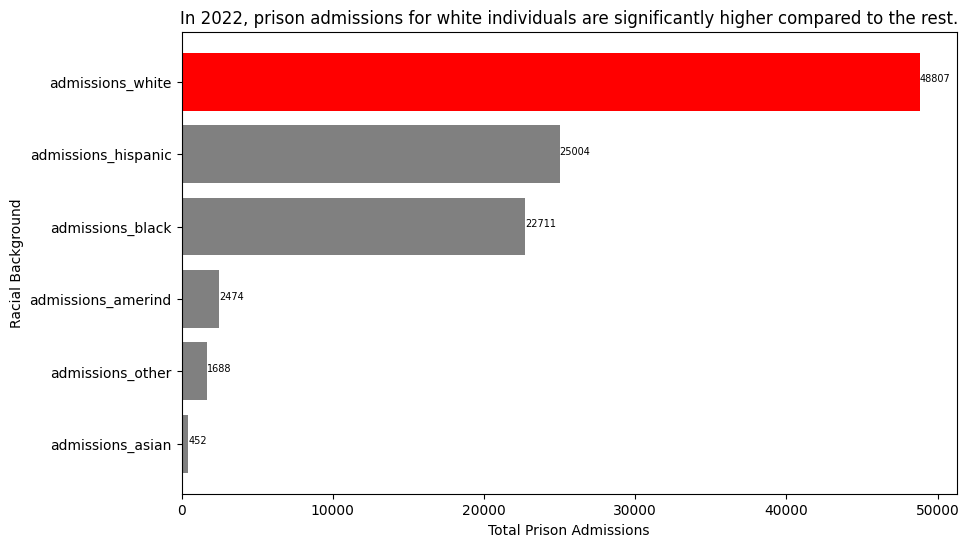

In [299]:
## bar chart showing the number of admissions per racial background in 2022.

data_race = df_2022[admissions_column]
data_race = data_race.drop("total_admissions",axis=1)
data_race = data_race.sum().to_frame()
data_race = data_race.sort_values(0,ascending=True)


new_labels = ["Admissions: Asians","Admissions: Other","Admissions: American-Indians","Admissions: Black","Admissions: Hispanic","Admissions: White"]


categories = data_race.index
values = data_race.iloc[:,0]

max_value = values.idxmax()
plt.figure(figsize=(10,6))
plt.barh(categories,values,color=["red" if category == max_value else "gray" for category in categories])


plt.title("In 2022, prison admissions for white individuals are significantly higher compared to the rest.")
plt.xlabel("Total Prison Admissions")
plt.ylabel("Racial Background")

for i,v in enumerate(values):
 plt.text(v,i,str(round(v)),fontsize=7)

plt.show()

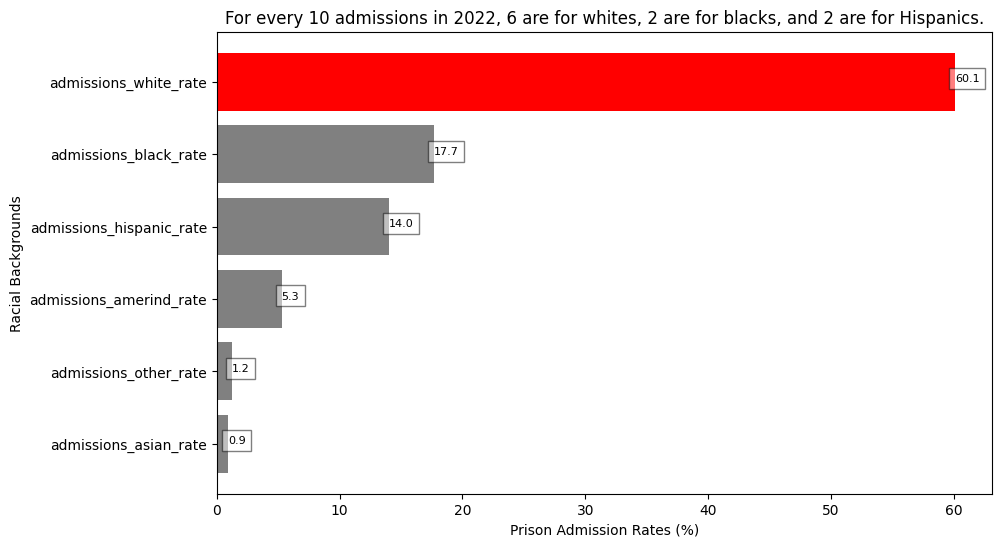

In [300]:
## bar chart showing the number of admissions per racial background in 2022.

data_race = df_2022[admissions_rate]
##data_race = data_race.drop("total_admissions",axis=1)
data_race = data_race.mean().to_frame()
data_race = data_race.sort_values(0,ascending=True)

y = data_race.index
x = data_race.iloc[:,0]

#data_race.plot(kind="barh")
plt.figure(figsize=(10,6))
plt.barh(y,x,color=["red" if category == "admissions_white_rate" else "gray" for category in y])
plt.title("For every 10 admissions in 2022, 6 are for whites, 2 are for blacks, and 2 are for Hispanics.")
plt.xlabel("Prison Admission Rates (%)")
plt.ylabel("Racial Backgrounds")

## add value label
for i, v in enumerate(x):
  plt.text(v,i,str(round(v,1)),fontsize=8,bbox={"facecolor":"white","alpha":0.5})

plt.show()


<ipython-input-301-fe3354369673>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_asian = df.groupby("year").agg("mean")["admissions_asian_rate"].to_frame()


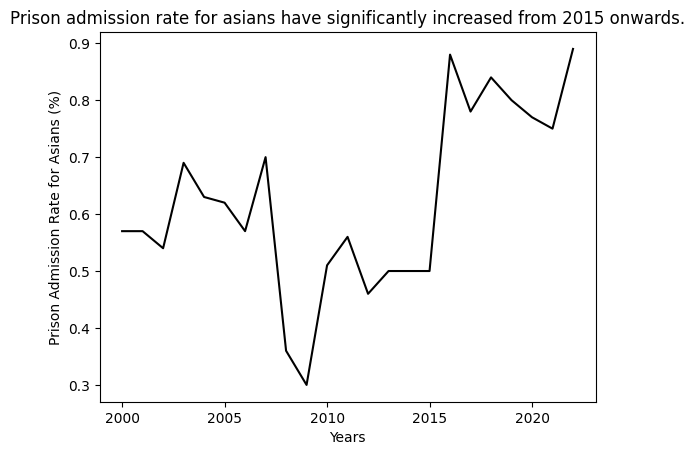

In [301]:
## line chart for the number of admissions-rate for asian indivdiuals over time.

data_asian = df.groupby("year").agg("mean")["admissions_asian_rate"].to_frame()
data_asian["admissions_asian_rate"] = data_asian["admissions_asian_rate"].apply(lambda x: round(x,2))

years = data_asian.index
values = data_asian.iloc[:,0]

plt.plot(years,values,ls="-",color="black")

plt.title("Prison admission rate for asians have significantly increased from 2015 onwards.")
plt.xlabel("Years")
plt.ylabel("Prison Admission Rate for Asians (%)")

plt.show()



<ipython-input-302-c7f26e3e34c4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby("year").agg("mean")[["admissions_asian_rate","admissions_black_rate"]]


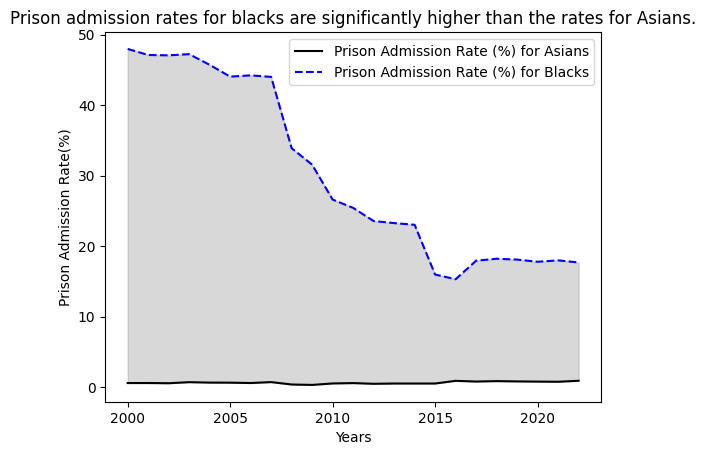

In [302]:
## line chart for the number of admissions-rate for asian indivdiuals over time.

data = df.groupby("year").agg("mean")[["admissions_asian_rate","admissions_black_rate"]]
data["admissions_asian_rate"] = data["admissions_asian_rate"].apply(lambda x: round(x,2))
data["admissions_black_rate"] = data["admissions_black_rate"].apply(lambda x: round(x,2))

years = data.index
asian_values = data.iloc[:,0]
black_values = data.iloc[:,1]

plt.plot(years,asian_values,ls="-",color="black",label="Prison Admission Rate (%) for Asians")
plt.plot(years,black_values,ls="--",color="blue",label="Prison Admission Rate (%) for Blacks")

plt.fill_between(years,asian_values,black_values,color="gray",alpha=0.3)

plt.title("Prison admission rates for blacks are significantly higher than the rates for Asians.")
plt.xlabel("Years")
plt.ylabel("Prison Admission Rate(%)")

plt.legend()

#text = tw.fill("Prison admission rates for blacks have steadily decreased over the years but is still significantly higher than the admission rates for asians.",width=20)

plt.show()


<ipython-input-303-dc38bb1c8bbb>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df_2022.groupby("state").agg("mean")["admissions_asian_rate"].to_frame().sort_values("admissions_asian_rate",ascending=False)


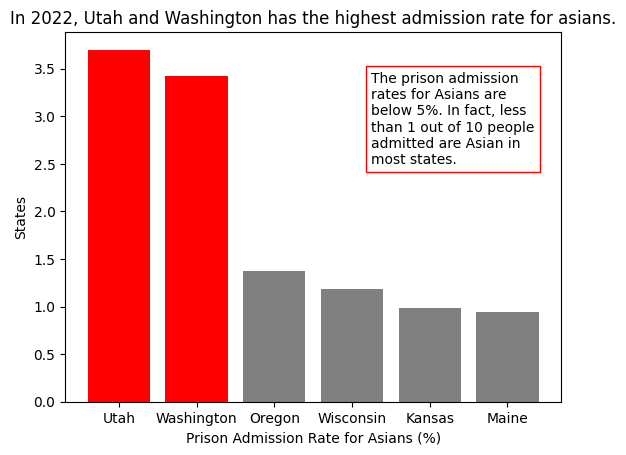

In [303]:
## bar chart for the top 5 states with the highest share of admissions for asian individuals in 2022.

data = df_2022.groupby("state").agg("mean")["admissions_asian_rate"].to_frame().sort_values("admissions_asian_rate",ascending=False)
data = data.iloc[0:6]
data["admissions_asian_rate"] = data["admissions_asian_rate"].apply(lambda x : round(x,2))

x = data.index
y = data.iloc[:,0]

text = tw.fill("The prison admission rates for Asians are below 5%. In fact, less than 1 out of 10 people admitted are Asian in most states.",width=23)

plt.bar(x,y,color=["red" if (state == "Washington") | (state == "Utah") else "gray" for state in data.index])
plt.title("In 2022, Utah and Washington has the highest admission rate for asians.")
plt.xlabel("Prison Admission Rate for Asians (%)")
plt.ylabel("States")
plt.text(3.25,2.5,text,bbox={"facecolor":"white","edgecolor":"red"})


plt.show()

<ipython-input-304-47d6ba886c3c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df_2022.groupby("state").agg("mean")["admissions_black_rate"].to_frame().sort_values("admissions_black_rate",ascending=False)


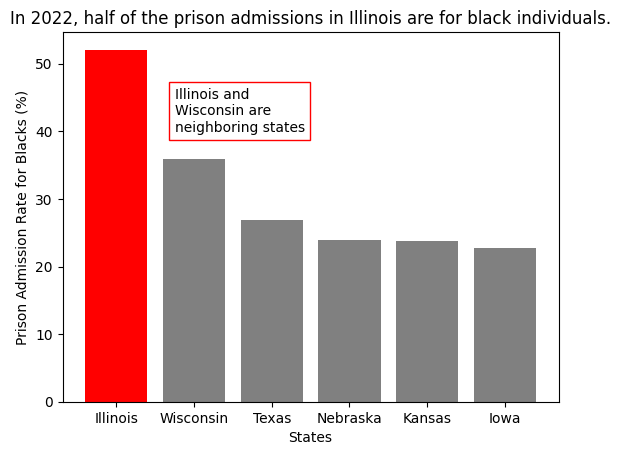

In [304]:
## admission rate for blacks in 2022.

data = df_2022.groupby("state").agg("mean")["admissions_black_rate"].to_frame().sort_values("admissions_black_rate",ascending=False)
data = data.iloc[0:6]
data["admissions_black_rate"] = data["admissions_black_rate"].apply(lambda x : round(x,2))

x = data.index
y = data.iloc[:,0]

text = tw.fill("Illinois and Wisconsin are neighboring states",width=20)

plt.bar(x,y,color=["red" if state == "Illinois" else "gray" for state in data.index])
plt.title("In 2022, half of the prison admissions in Illinois are for black individuals.")
plt.ylabel("Prison Admission Rate for Blacks (%)")
plt.xlabel("States")
plt.text(0.75,40,text,bbox={"facecolor":"white","edgecolor":"red"})

plt.show()

<ipython-input-305-499e7e3f24ba>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df_2022.groupby("state").agg("mean")["admissions_hispanic_rate"].to_frame().sort_values("admissions_hispanic_rate",ascending=False)


Text(0.75, 42, 'California boasts a large Hispanic\npopulation.')

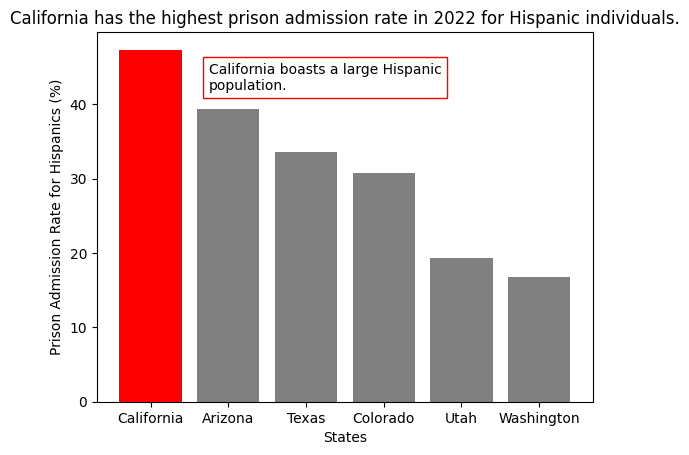

In [305]:
## admission rate for hispanics in 2022.

data = df_2022.groupby("state").agg("mean")["admissions_hispanic_rate"].to_frame().sort_values("admissions_hispanic_rate",ascending=False)
data = data.iloc[0:6]
data["admissions_hispanic_rate"] = data["admissions_hispanic_rate"].apply(lambda x : round(x,2))

x = data.index
y = data.iloc[:,0]

plt.bar(x,y,color=["red" if state == "California" else "gray" for state in data.index])
plt.title("California has the highest prison admission rate in 2022 for Hispanic individuals.")
plt.ylabel("Prison Admission Rate for Hispanics (%)")
plt.xlabel("States")

text = tw.fill("California boasts a large Hispanic population.",width=40)
plt.text(0.75,42,text,bbox={"facecolor":"white","edgecolor":"red"})